# Heat Fluxes

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import matplotlib.colors as colors
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw
import scipy.ndimage as filter
import scipy.interpolate as interpolate

In [3]:
import os
os.chdir('/home.ufs/amf2288/argo-intern/funcs')
import filt_funcs as ff

In [4]:
# Set title size
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16  # Titles larger

# Set axis label size
plt.rcParams['axes.labelsize'] = 14  # Labels slightly smaller

# Load data (from eddy_diff notebook)

In [5]:
diff_rho = xr.open_dataset('/swot/SUM05/amf2288/diff_rho_3.nc')
K_rho = diff_rho.K_rho

In [6]:
K_rho = K_rho.rename({'rho_grid':'density'})

In [ ]:
ds_binned = xr.open_dataset('/swot/SUM05/amf288/sync-boxes/ds_binned_high_res.nc')

In [7]:
term2_ds = xr.open_dataset('/swot/SUM05/amf2288/var-boxes/term2.nc').load()
term2 = term2_ds.ct_e_z2_filt.rename('term2')

In [8]:
term3_2 = xr.open_dataset('/swot/SUM05/amf2288/var-boxes/Ke_term3.nc').load()
term3 = np.sqrt(term3_2.ct_m)

In [9]:
%%time
temp_flux_dxdy = K_rho*(term2/term3)

CPU times: user 97.7 ms, sys: 154 ms, total: 252 ms
Wall time: 277 ms


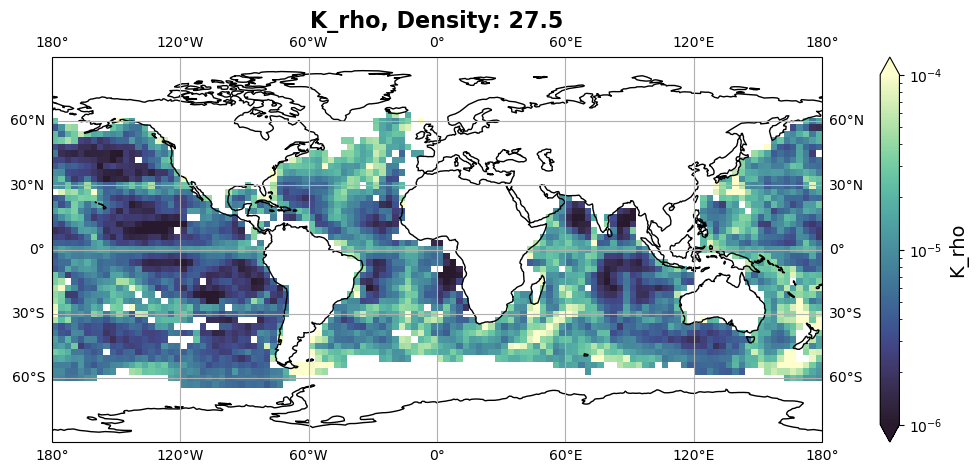

In [28]:
density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
K_rho.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r, norm=colors.LogNorm(vmin=1e-6, vmax=1e-4))
ax.set_title('K_rho, Density: {}'.format(np.round(term2.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/K_rho_275.png', bbox_inches='tight')

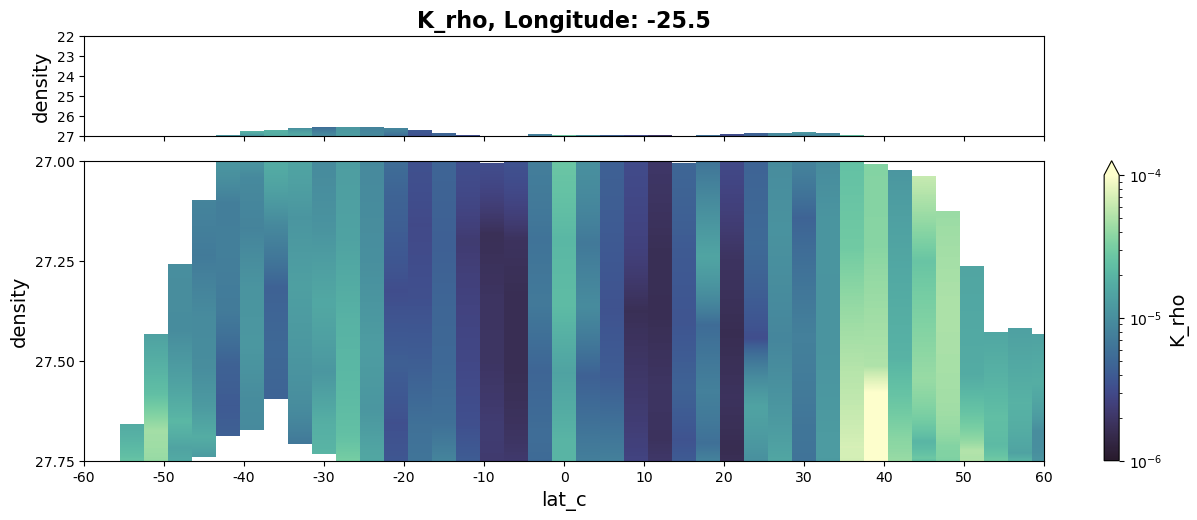

In [86]:
lon = -25

fig = plt.figure(figsize=(15, 5))
top_ax = fig.add_axes([0.1, 0.75, 0.64, 0.2])   # top subplot (1/4 of height)
bottom_ax = fig.add_axes([0.1, 0.1, 0.8, 0.6]) # bottom subplot (3/4 of height)

norm = colors.LogNorm(vmin=1e-6, vmax=1e-4)

K_rho.sel(lon_c=lon, method='nearest').plot(ax=top_ax, x='lat_c', y='density', cmap=cmo.deep_r, norm=norm, add_colorbar=False)
top_ax.set_xticks(np.arange(-70, 71, 10))
top_ax.set_xticklabels([''] * len(top_ax.get_xticks()))
top_ax.set_yticks(np.arange(27.0, 21.5, -1.0))
top_ax.set_xlabel('')
top_ax.set_ylim(27, 22)
top_ax.set_xlim(-60, 60)
top_ax.set_title(f'K_rho, Longitude: {K_rho.sel(lon_c=lon, method="nearest").lon_c.values}')

K_rho.sel(lon_c=lon, method='nearest').plot(ax=bottom_ax, x='lat_c', y='density', cmap=cmo.deep_r, norm=norm)
bottom_ax.set_xticks(np.arange(-70, 71, 10))
bottom_ax.set_xticklabels(np.arange(-70, 71, 10))
bottom_ax.set_yticks(np.arange(27.75, 25.5, -0.25))
bottom_ax.set_ylim(27.75, 27)
bottom_ax.set_xlim(-60, 60)
bottom_ax.set_title('')

plt.savefig('../notebooks/argo_clim/figs/K_rho_275_sect.png', bbox_inches='tight')

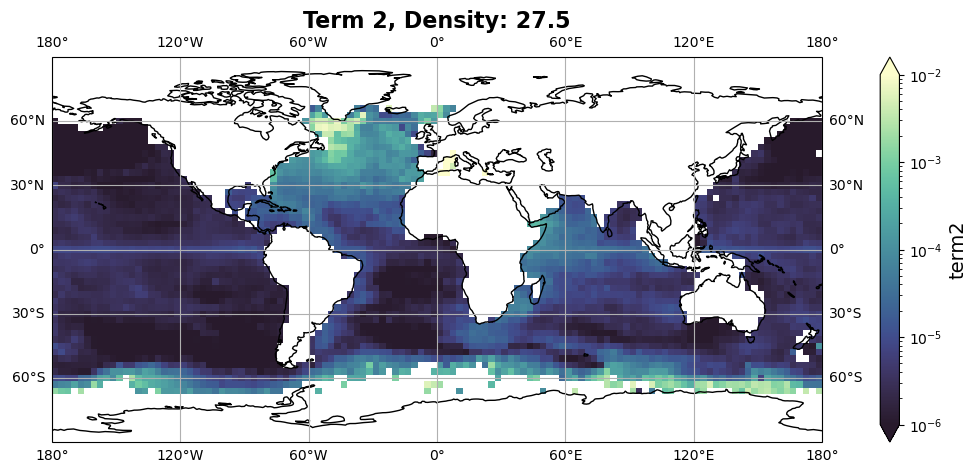

In [57]:
density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
term2.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r, norm=colors.LogNorm(vmin=1e-6, vmax=1e-2))
ax.set_title('Term 2, Density: {}'.format(np.round(term2.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/term2_275.png', bbox_inches='tight')

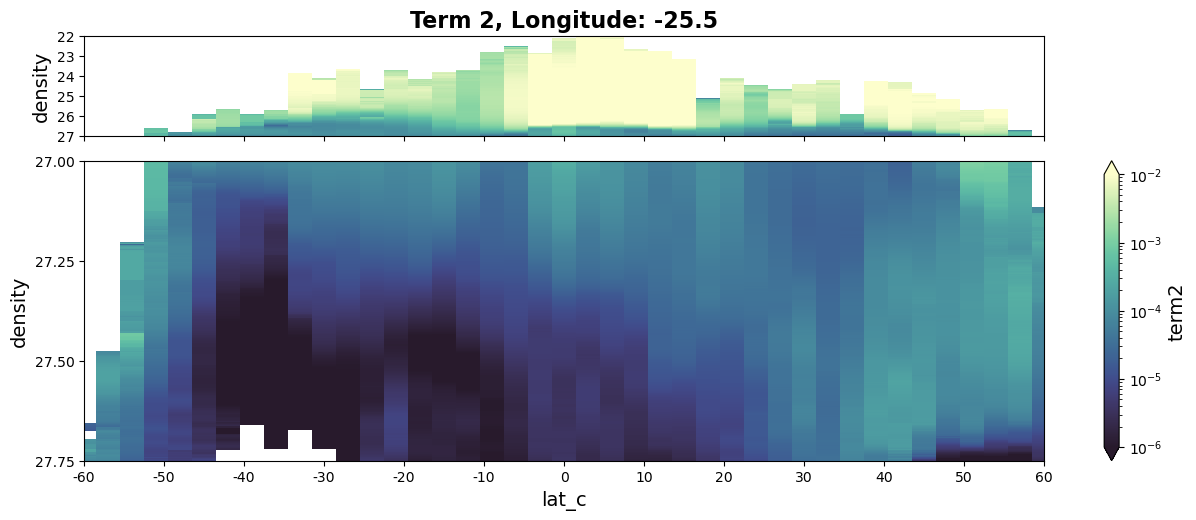

In [85]:
lon = -25

fig = plt.figure(figsize=(15, 5))
top_ax = fig.add_axes([0.1, 0.75, 0.64, 0.2])   # top subplot (1/4 of height)
bottom_ax = fig.add_axes([0.1, 0.1, 0.8, 0.6]) # bottom subplot (3/4 of height)

norm = colors.LogNorm(vmin=1e-6, vmax=1e-2)

term2.sel(lon_c=lon, method='nearest').plot(ax=top_ax, x='lat_c', y='density', cmap=cmo.deep_r, norm=norm, add_colorbar=False)
top_ax.set_xticks(np.arange(-70, 71, 10))
top_ax.set_xticklabels([''] * len(top_ax.get_xticks()))
top_ax.set_yticks(np.arange(27.0, 21.5, -1.0))
top_ax.set_xlabel('')
top_ax.set_ylim(27, 22)
top_ax.set_xlim(-60, 60)
top_ax.set_title(f'Term 2, Longitude: {K_rho.sel(lon_c=lon, method="nearest").lon_c.values}')

term2.sel(lon_c=lon, method='nearest').plot(ax=bottom_ax, x='lat_c', y='density', cmap=cmo.deep_r, norm=norm)
bottom_ax.set_xticks(np.arange(-70, 71, 10))
bottom_ax.set_xticklabels(np.arange(-70, 71, 10))
bottom_ax.set_yticks(np.arange(27.75, 25.5, -0.25))
bottom_ax.set_ylim(27.75, 27)
bottom_ax.set_xlim(-60, 60)
bottom_ax.set_title('')

plt.savefig('../notebooks/argo_clim/figs/term2_275_sect.png', bbox_inches='tight')

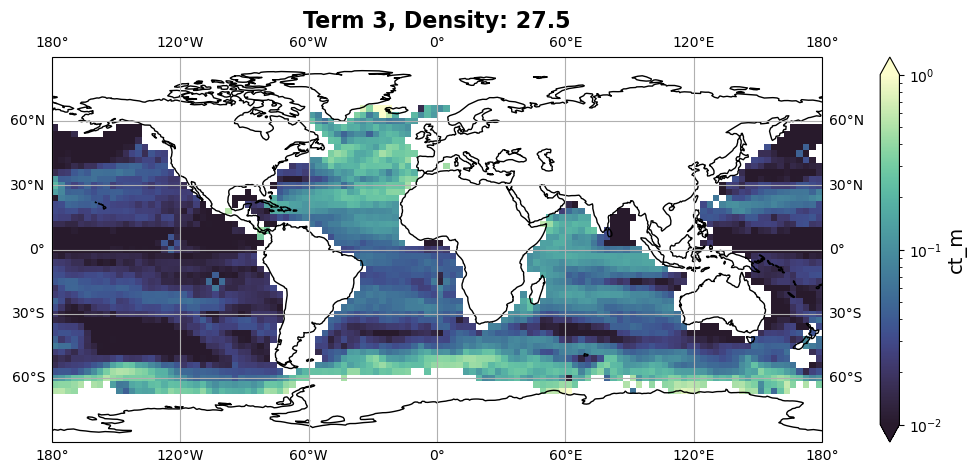

In [76]:
density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
term3.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r,  norm=colors.LogNorm(vmin=1e-2, vmax=1))
#ax.set_title('sqrt(dT/dx**2 + dT/dy**2), density: {}'.format(np.round(temp_flux_dxdy.sel(density=density, method='nearest').density.values, 1)))
ax.set_title('Term 3, Density: {}'.format(np.round(term3.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/term3_NOSQUARE_275.png', bbox_inches='tight')

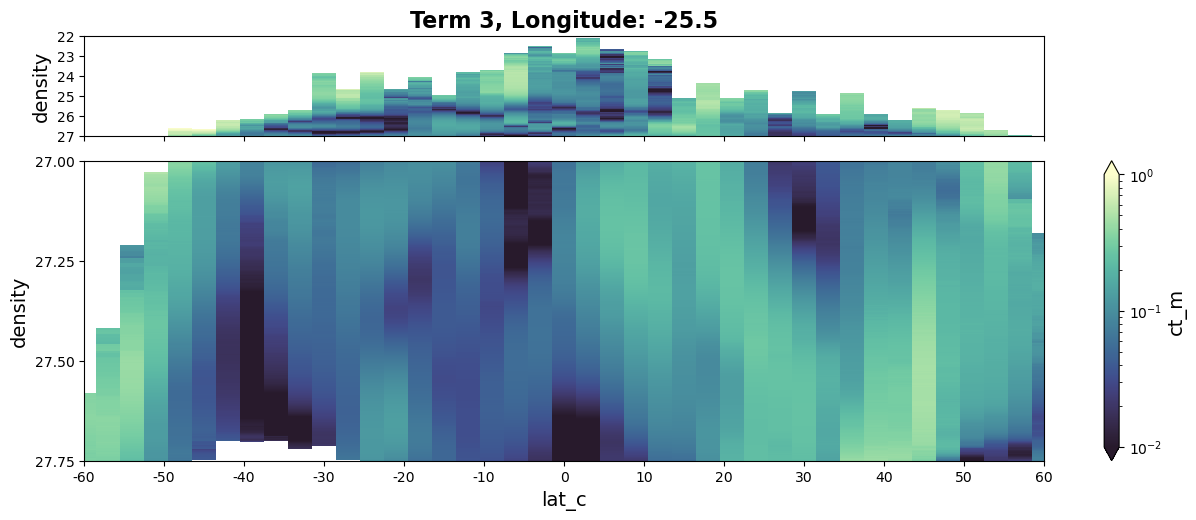

In [84]:
lon = -25

fig = plt.figure(figsize=(15, 5))
top_ax = fig.add_axes([0.1, 0.75, 0.64, 0.2])   # top subplot (1/4 of height)
bottom_ax = fig.add_axes([0.1, 0.1, 0.8, 0.6]) # bottom subplot (3/4 of height)

norm = colors.LogNorm(vmin=1e-2, vmax=1)

term3.sel(lon_c=lon, method='nearest').plot(ax=top_ax, x='lat_c', y='density', cmap=cmo.deep_r, norm=norm, add_colorbar=False)
top_ax.set_xticks(np.arange(-70, 71, 10))
top_ax.set_xticklabels([''] * len(top_ax.get_xticks()))
top_ax.set_yticks(np.arange(27.0, 21.5, -1.0))
top_ax.set_xlabel('')
top_ax.set_ylim(27, 22)
top_ax.set_xlim(-60, 60)
top_ax.set_title(f'Term 3, Longitude: {K_rho.sel(lon_c=lon, method="nearest").lon_c.values}')

term3.sel(lon_c=lon, method='nearest').plot(ax=bottom_ax, x='lat_c', y='density', cmap=cmo.deep_r, norm=norm)
bottom_ax.set_xticks(np.arange(-70, 71, 10))
bottom_ax.set_xticklabels(np.arange(-70, 71, 10))
bottom_ax.set_yticks(np.arange(27.75, 25.5, -0.25))
bottom_ax.set_ylim(27.75, 27)
bottom_ax.set_xlim(-60, 60)
bottom_ax.set_title('')

plt.savefig('../notebooks/argo_clim/figs/term3_275_sect.png', bbox_inches='tight')

CPU times: user 810 ms, sys: 40.2 ms, total: 850 ms
Wall time: 845 ms


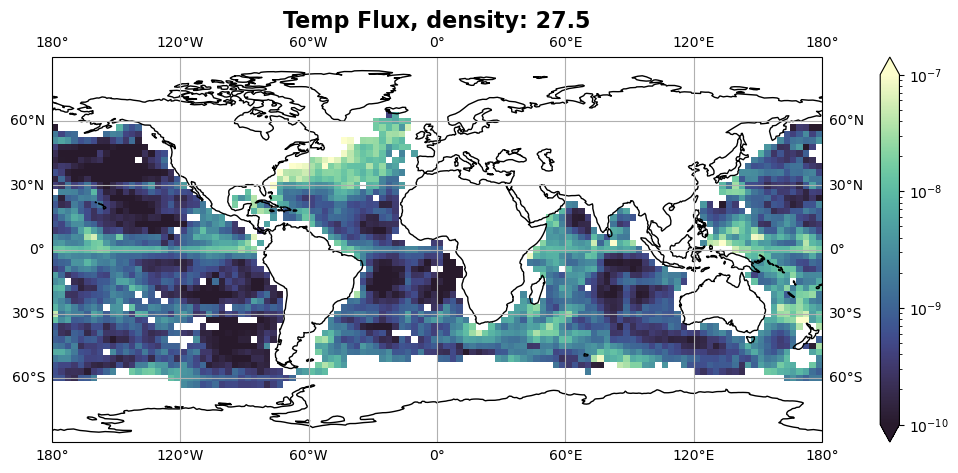

In [82]:
%%time

density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
temp_flux_dxdy.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r, norm=colors.LogNorm(vmin=1e-10, vmax=1e-7))
plt.title('Temp Flux, density: {}'.format(np.round(temp_flux_dxdy.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/temp_flux_275.png', bbox_inches='tight')

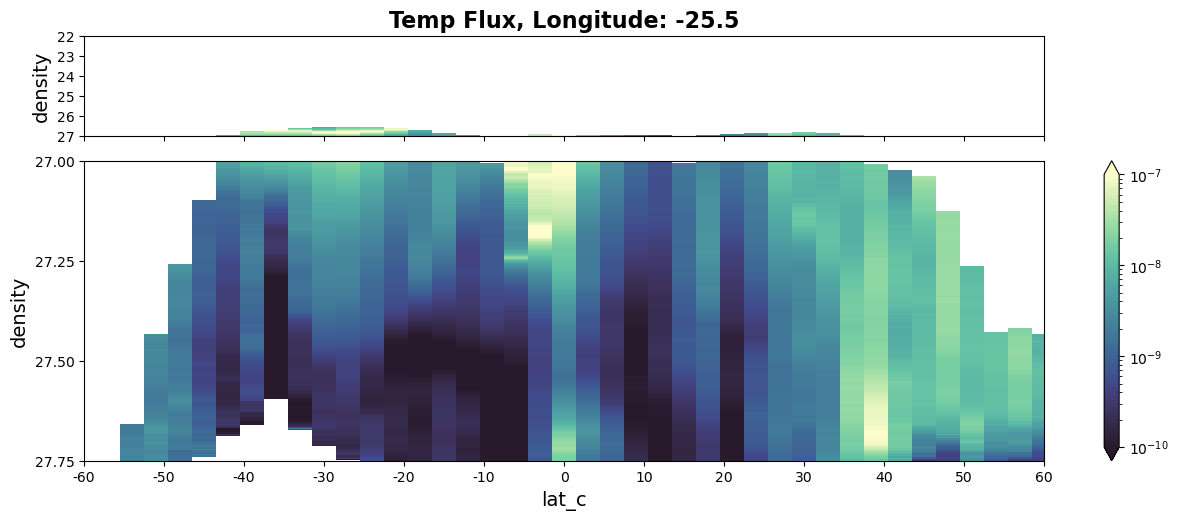

In [83]:
lon = -25

fig = plt.figure(figsize=(15, 5))
top_ax = fig.add_axes([0.1, 0.75, 0.64, 0.2])   # top subplot (1/4 of height)
bottom_ax = fig.add_axes([0.1, 0.1, 0.8, 0.6]) # bottom subplot (3/4 of height)

norm = colors.LogNorm(vmin=1e-10, vmax=1e-7)

temp_flux_dxdy.sel(lon_c=lon, method='nearest').plot(ax=top_ax, x='lat_c', y='density', cmap=cmo.deep_r, norm=norm, add_colorbar=False)
top_ax.set_xticks(np.arange(-70, 71, 10))
top_ax.set_xticklabels([''] * len(top_ax.get_xticks()))
top_ax.set_yticks(np.arange(27.0, 21.5, -1.0))
top_ax.set_xlabel('')
top_ax.set_ylim(27, 22)
top_ax.set_xlim(-60, 60)
top_ax.set_title(f'Temp Flux, Longitude: {K_rho.sel(lon_c=lon, method="nearest").lon_c.values}')

temp_flux_dxdy.sel(lon_c=lon, method='nearest').plot(ax=bottom_ax, x='lat_c', y='density', cmap=cmo.deep_r, norm=norm)
bottom_ax.set_xticks(np.arange(-70, 71, 10))
bottom_ax.set_xticklabels(np.arange(-70, 71, 10))
bottom_ax.set_yticks(np.arange(27.75, 25.5, -0.25))
bottom_ax.set_ylim(27.75, 27)
bottom_ax.set_xlim(-60, 60)
bottom_ax.set_title('')

plt.savefig('../notebooks/argo_clim/figs/temp_flux_275_sect.png', bbox_inches='tight')

In [88]:
density = temp_flux_dxdy.density + 1000
heat_flux = temp_flux_dxdy*density*4000

CPU times: user 783 ms, sys: 25.8 ms, total: 809 ms
Wall time: 805 ms


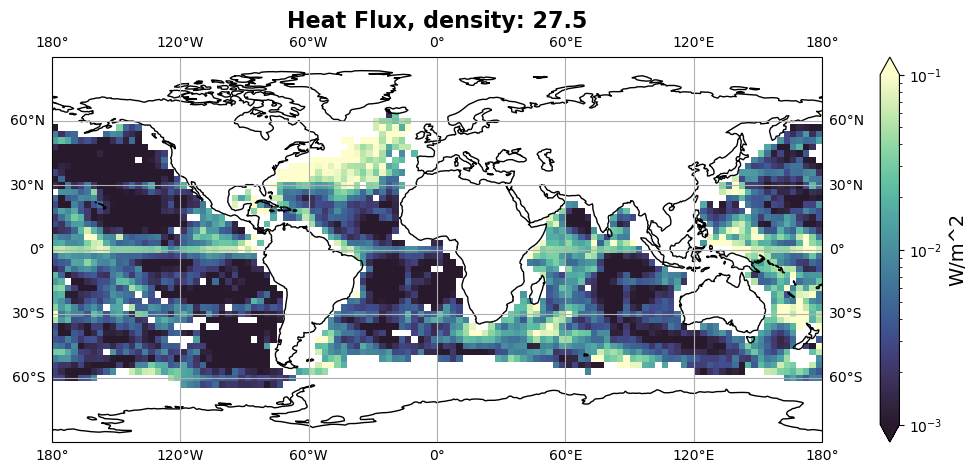

In [89]:
%%time

density = 27.5

fig=plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
heat_flux.sel(density=density, method='nearest').plot(x='lon_c',y='lat_c',ax=ax,transform=ccrs.PlateCarree(), cmap=cmo.deep_r, norm=colors.LogNorm(vmin=1e-3, vmax=1e-1), cbar_kwargs={'label': 'W/m^2'})
plt.title('Heat Flux, density: {}'.format(np.round(temp_flux_dxdy.sel(density=density, method='nearest').density.values, 1)))
plt.savefig('../notebooks/argo_clim/figs/heat_flux_275.png', bbox_inches='tight')

heat flux = $\widetilde{u}\widetilde{T} \frac{^\circ C m}{s}*\rho_0 \frac{kg}{m^3}*C_p \frac{J}{kg ^\circ C}$

heat flux = $2570 \frac{W}{m^2}$

where $\rho_0 = density + 1000$,  $C_p = 4000 \frac{J}{kg ^\circ C}$



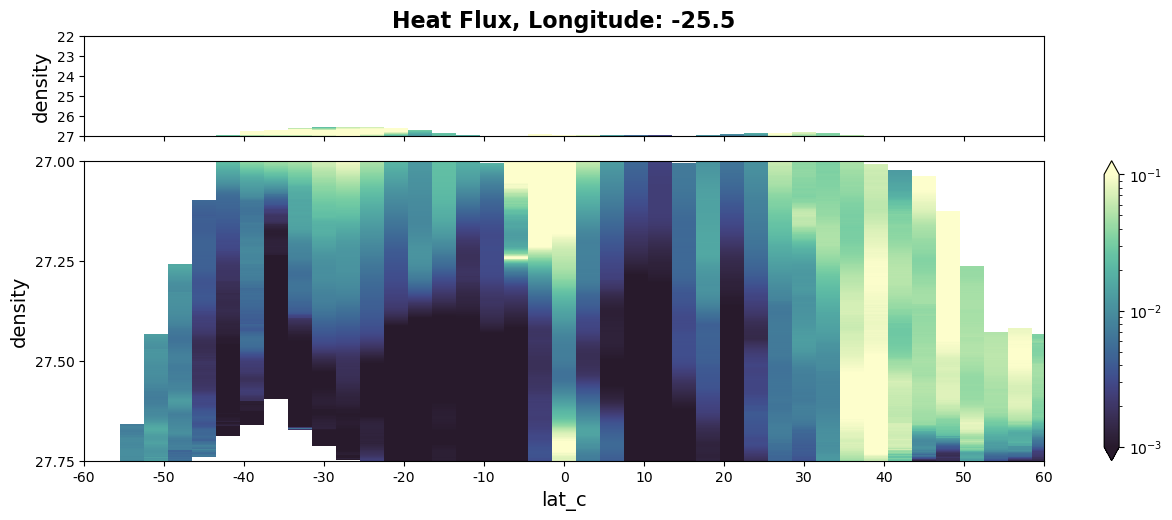

In [90]:
lon = -25

fig = plt.figure(figsize=(15, 5))
top_ax = fig.add_axes([0.1, 0.75, 0.64, 0.2])   # top subplot (1/4 of height)
bottom_ax = fig.add_axes([0.1, 0.1, 0.8, 0.6]) # bottom subplot (3/4 of height)

norm = colors.LogNorm(vmin=1e-3, vmax=1e-1)

heat_flux.sel(lon_c=lon, method='nearest').plot(ax=top_ax, x='lat_c', y='density', cmap=cmo.deep_r, norm=norm, add_colorbar=False)
top_ax.set_xticks(np.arange(-70, 71, 10))
top_ax.set_xticklabels([''] * len(top_ax.get_xticks()))
top_ax.set_yticks(np.arange(27.0, 21.5, -1.0))
top_ax.set_xlabel('')
top_ax.set_ylim(27, 22)
top_ax.set_xlim(-60, 60)
top_ax.set_title(f'Heat Flux, Longitude: {K_rho.sel(lon_c=lon, method="nearest").lon_c.values}')

heat_flux.sel(lon_c=lon, method='nearest').plot(ax=bottom_ax, x='lat_c', y='density', cmap=cmo.deep_r, norm=norm)
bottom_ax.set_xticks(np.arange(-70, 71, 10))
bottom_ax.set_xticklabels(np.arange(-70, 71, 10))
bottom_ax.set_yticks(np.arange(27.75, 25.5, -0.25))
bottom_ax.set_ylim(27.75, 27)
bottom_ax.set_xlim(-60, 60)
bottom_ax.set_title('')

plt.savefig('../notebooks/argo_clim/figs/heat_flux_275_sect.png', bbox_inches='tight')